#Cleaning

**Importing Libraries**

the next block will be responsible for installing and importing the necessary libraries and functions for this section.

In [ ]:
import requests 
import pandas as pd
import random
import json
from google.colab import drive
import re
import numpy as np

import datetime
from datetime import date
import time

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import GradientBoostingRegressor

**conect to google drive**


In [ ]:
#conect to google drive
drive.mount('/content/drive')

#path in google-drive
%cd /content/drive/My Drive/Colab Notebooks

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


load data set phone

In [ ]:
#load phone csv
dfPhone = pd.read_csv('phone.csv')

display data info


In [ ]:
#display data info
dfPhone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10064 entries, 0 to 10063
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          10064 non-null  object
 1   brand         10064 non-null  object
 2   mainCamera    10060 non-null  object
 3   selfieCamera  8867 non-null   object
 4   battery       10059 non-null  object
 5   CPU           6472 non-null   object
 6   resolution    10036 non-null  object
 7   size          8957 non-null   object
 8   Storage       8521 non-null   object
 9   RAM           6404 non-null   object
 10  thickness     9799 non-null   object
 11  weight        9978 non-null   object
 12  releaseDate   10063 non-null  object
 13  price         6645 non-null   object
 14  link          10064 non-null  object
dtypes: object(15)
memory usage: 1.2+ MB


Clean na/null

In [ ]:
#clean na
dfPhone.dropna(inplace=True)

#display data info
dfPhone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4621 entries, 0 to 10043
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          4621 non-null   object
 1   brand         4621 non-null   object
 2   mainCamera    4621 non-null   object
 3   selfieCamera  4621 non-null   object
 4   battery       4621 non-null   object
 5   CPU           4621 non-null   object
 6   resolution    4621 non-null   object
 7   size          4621 non-null   object
 8   Storage       4621 non-null   object
 9   RAM           4621 non-null   object
 10  thickness     4621 non-null   object
 11  weight        4621 non-null   object
 12  releaseDate   4621 non-null   object
 13  price         4621 non-null   object
 14  link          4621 non-null   object
dtypes: object(15)
memory usage: 577.6+ KB


remove duplicate and reindex df

In [ ]:
#remove duplicate
dfPhone = dfPhone.drop_duplicates(keep= False)

#df reastart to index
dfPhone = dfPhone.reset_index(drop=True)
dfTemp=dfPhone

#display data info
dfPhone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4035 entries, 0 to 4034
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          4035 non-null   object
 1   brand         4035 non-null   object
 2   mainCamera    4035 non-null   object
 3   selfieCamera  4035 non-null   object
 4   battery       4035 non-null   object
 5   CPU           4035 non-null   object
 6   resolution    4035 non-null   object
 7   size          4035 non-null   object
 8   Storage       4035 non-null   object
 9   RAM           4035 non-null   object
 10  thickness     4035 non-null   object
 11  weight        4035 non-null   object
 12  releaseDate   4035 non-null   object
 13  price         4035 non-null   object
 14  link          4035 non-null   object
dtypes: object(15)
memory usage: 473.0+ KB


**function to clear data**
- remove all labels (units etc)

In [ ]:
###-------------------func to clear data-----------------------###

#clear data by id lable and steal just a number
def removeTextByLabel(df, col, label):
  for i in range(0, len(df)):
    data = df.loc[i,col]
    sumData=0
    try:
      if 'Yes' in data:
        dfPhone.loc[i,col] = -1
        continue
      # if data ontains several entries.  REGEX
      arr = re.findall(rf"\d\d\d.\d{label}|\d\d.\d{label}|\d.\d{label}|\d\d\d\d.\d\d {label}|\d\d\d\d.\d {label}|\d\d\d.\d\d {label}|\d\d.\d\d {label}|\d.\d\d {label}|\d\d\d.\d {label}|\d\d.\d\d {label}|\d\d.\d {label}|\d.\d\d {label}|\d.\d {label}|\d\d\d\d\d\d {label}|\d\d\d\d\d {label}|\d\d\d\d {label}|\d\d\d {label}|\d\d {label}|\d {label}|\d\d\d\d{label}|\d\d\d{label}|\d\d{label}|\d{label}",data)
      
      #For data that contains as many values (camera)
      for j in arr:
        j = j.replace(label,"")
        try:
          sumData+=int(j)
        except:
          try:
            sumData+=float(j)
          except:
            pass
      df.loc[i,col] = sumData
    except:
      pass

#check if not exsist label and put 0
def clearDataByLabel(df, col, label):

  #list-all item not exsist
  l=list()

  for i in range(0, len(df)):
    battery = df.loc[i][col]
    try:
      if battery.find(label)==-1:
        l.append(df.loc[i][col])
    except:
      pass
  l = list(dict.fromkeys(l))
  #replace  to 0 ,to check data
  for i in l:
    df[col] = df[col].replace([i],0)

#clear Data for col
def clearDataForCol(df, col, label):
  clearDataByLabel(df, col, label)
  removeTextByLabel(df, col, label)


#clear weight
#Where there is more than a number to delete
def clearWeight(df):
  for i in range(0,len(df)):
    try:
      float(df.loc[i]["weight"])
    except:
      df = df.drop(index=[i])
  return df


def clearReleaseDate(col):
  dicDateTrans={"th":"" ,", January ": "-01-", ", February ": "-02-", ", March ": "-03-", ", April ": "-04-", ",  April": "-04-", ", May ": "-05-", ", June ": "-06-", ", July ": "-07-", ", August ": "-08-", ", Septeber ": "-09-", ", September ": "-09-", ", October ": "-10-", ", November ": "-11-", ", December ": "-12-", ", Q1 ": "-02-", ", Q2 ": "-05-", ", Q3 ": "-08-", ", Q4 ": "-11-",", January": "-01-15", ", February": "-02-15", ", March": "-03-15", ", April": "-04-15", ", May": "-05-15", ", June": "-06-15", ", July": "-07-15", ", August": "-08-15", ", Septeber": "-09-15", ", September": "-09-15", ", October": "-10-15", ", November": "-11-15", ", December": "-12-15", ", Q1": "-02-15", ", Q2": "-05-15", ", Q3": "-08-15", ", 3Q": "-08-15", ", Q4": "-11-15"," ":""}
  dfPhone['releaseDate']=dfPhone['releaseDate'].replace(dicDateTrans, regex=True)
  dfPhone['releaseDate']=dfPhone['releaseDate'].replace({"Exp.release":""}, regex=True)

  for i in range(0, len(dfPhone)):
    try:
      data = dfPhone.loc[i,col]
      arr = re.findall(rf"\d\d\d\d-\d\d-\d\d|\d\d\d\d-\d\d-\d|\d\d\d\d-\d\d-|\d\d\d\d",data)
      #check is not date
      if len(arr)==0:
        dfPhone.loc[i,col]=0
      #just year to convert to date
      if len(arr[0])==4:
        dfPhone.loc[i,col] = dfPhone.loc[i,col]+"-06-01"
      if len(arr[0])==8:
        dfPhone.loc[i,col] = dfPhone.loc[i,col]+"15"
    except:
      pass

#clear CPU
def clearCPU():
  for i in range(0, len(dfPhone)):
    dicCPU={"Dual-core":2,"Quad-core":4,"Quadcore":4,"Hexa-core":6,"Octa-core":8,"Deca-core":10}

    try:
      data = dfPhone.loc[i,"CPU"]
      #REGEX force for CPU (GHz)
      arrGHz = re.findall(rf"\d.\d\d GHz|\d.\d GHz|\d GHz|\d.\d\dGHz|\d.\dGHz|\dGHz",data)
      #REGEX force for CPU (HMz)
      arrMHz = re.findall(rf"\d\d\d MHz|\d\d\dMHz",data)
      if len(arrGHz)==0 and len(arrMHz)==0 :
        #no recognize to CPU
        dfPhone.loc[i,"CPU"]=0
        continue
      if len(arrGHz)>1 :
        #array count of each cpu
        arrCountGHz = re.findall(rf"\dx\d.\d\d GHz|\dx\d.\d GHz|\dx\d GHz|\dx\d.\d\dGHz|\dx\d.\dGHz|\dGHz",data)
        #print(data + "-------------")
        try:
          sumForceCPU=0
          for j in range(0 ,len(arrGHz)):
            #REGEX remove label
            arrCountGHzWithOutL = re.sub(rf"x\d.\d\d GHz|x\d.\d GHz|x\d GHz|x\d.\d\dGHz|x\d.\dGHz|xGHz", "", arrCountGHz[j])
            arrGHzWithOutL = re.sub(rf" GHz|GHz", "", arrGHz[j])
            #num CPU X force of each CPU
            sumForceCPU+=float(arrGHzWithOutL)*int(arrCountGHzWithOutL)

          dfPhone.loc[i,"CPU"]=sumForceCPU
          continue
        except:
          pass
      if len(arrGHz)==1 :
        flag=False
        arrGHzWithOutL = re.sub(rf" GHz|GHz", "", arrGHz[0])
        for j in dicCPU:
          if j in data:
            dfPhone.loc[i,"CPU"]=float(arrGHzWithOutL)*dicCPU[j]
            flag=True
        #if not in dicte
        if flag== False:
          dfPhone.loc[i,"CPU"]=float(arrGHzWithOutL)
        continue

      if len(arrMHz)>0 :
        falgMHz=False
        dualMHz=re.findall(rf"Dual|dual",data)
        if len(dualMHz)>0:
          falgMHz=True
        forceMHz = arrGHzWithOutL = re.sub(rf" MHz|MHz", "", arrMHz[0])
        #convert HMz to GHz
        forceMHz=float(forceMHz)*0.001
        if falgMHz:
          forceMHz*=2
        dfPhone.loc[i,"CPU"]=forceMHz
    except:
      #Everything failed gets 0
      dfPhone.loc[i,"CPU"]=0

  for i in range(0, len(dfPhone)):
    try:
      float(dfPhone.loc[i,"CPU"])
    except:
      dfPhone.loc[i,"CPU"]=0


def clearStorageRAM(col):
  for i in range(0, len(dfPhone)):
    data = dfPhone.loc[i,col]
    try:
      if '(' in data:
        dfPhone.loc[i,col] = 0
        continue
      # if data ontains several entries.  REGEX
      arrGB = re.findall(rf" GB|GB",data)
      arrMB = re.findall(rf" MB|MB",data)
      if len(arrGB)>0:
        data = re.sub(rf" GB|GB", "", data)
        try:
          dfPhone.loc[i,col] = int(data)
        except:
          dfPhone.loc[i,col] = 0
      if len(arrMB)>0:
        data = re.sub(rf" MB|MB", "", data)
        try:
          dfPhone.loc[i,col] = int(data)*0.001
        except:
          dfPhone.loc[i,col] = 0
      if len(arrMB)==0 and len(arrGB)==0:
        dfPhone.loc[i,col] = 0
    except:
      pass

def getPriceFromLink():
  for i in range(0, len(dfPhone)):
      convertDolarToEUR =0.96
      dic={" ":"" ,"\u2009": "","$": "","€": "",",": ""}
      data = dfPhone.loc[i]['price']
      EUR = re.findall(rf"€ \d\d,\d\d\d.\d\d|€ \d,\d\d\d.\d\d|€ \d,\d\d\d.\d|€ \d\d\d.\d\d|€ \d\d\d.\d|€ \d\d.\d\d|€ \d\d.\d|€ \d.\d\d|€ \d.\d",data)
      DOL = re.findall(rf"\$ \d\d,\d\d\d.\d\d|\$ \d,\d\d\d.\d\d|\$ \d,\d\d\d.\d|\$ \d\d\d.\d\d|\$ \d\d\d.\d|\$ \d\d.\d\d|\$ \d\d.\d|\$ \d.\d\d|\$ \d.\d",data)
      if len(EUR)>0:
        for x in dic:
          EUR[0] = EUR[0].replace(x, dic[x])
        try:
          float(EUR[0])
          dfPhone.loc[i]['price'] = EUR[0] + " EUR"
        except:
            dfPhone.loc[i]['price']=0
      if len(DOL)>0 and len(EUR)==0:
        for x in dic:
          DOL[0] = DOL[0].replace(x, dic[x])
        try:
          float(DOL[0])
          DOL[0] = convertDolarToEUR *float(DOL[0])
          dfPhone.loc[i]['price'] =  DOL[0] + " EUR"
        except:
            dfPhone.loc[i]['price']=0

Call all functions that clear that data

In [ ]:
dfTemp=dfPhone

clearReleaseDate('releaseDate')
getPriceFromLink()
clearDataForCol(dfPhone, 'battery',"mAh")
clearDataForCol(dfPhone, 'mainCamera',"MP")
clearDataForCol(dfPhone, 'selfieCamera',"MP")
clearDataForCol(dfPhone, 'thickness',"mm")
clearDataForCol(dfPhone, 'size',"inches")
clearStorageRAM('RAM')
clearStorageRAM('Storage')
clearDataForCol(dfPhone, 'price',"EUR")
clearDataForCol(dfPhone, 'resolution',"ppi")
clearCPU()

dfPhone = clearWeight(dfPhone)


clear all rows that contain invalid values in features

In [ ]:
#remove all mainCamera=-1 or not exsist mainCamera
dfPhone = dfPhone[dfTemp.mainCamera != -1]
dfTemp=dfPhone

#remove all selfieCamera=-1 or not exsist selfieCamera
dfPhone = dfPhone[dfTemp.selfieCamera != -1]
dfTemp=dfPhone

#remove all battery=0 or not exsist battery
dfPhone = dfPhone[dfTemp.battery != 0]
dfTemp=dfPhone

#remove all thickness=0 or not exsist thickness
dfPhone = dfPhone[dfTemp.thickness != 0]
dfTemp=dfPhone

#remove all RAM=0 or not exsist RAM
dfPhone = dfPhone[dfTemp.RAM != 0]
dfTemp=dfPhone

#remove all Storage=0 or not exsist Storage
dfPhone = dfPhone[dfTemp.Storage != 0]
dfTemp=dfPhone

#remove all resolution=0 or not exsist resolution
dfPhone = dfPhone[dfTemp.resolution != 0]
dfTemp=dfPhone

#remove all price=0 or not exsist price
dfPhone = dfPhone[dfTemp.price != 0]
dfTemp=dfPhone

#remove all CPU=0 or not exsist CPU
dfPhone = dfPhone[dfTemp.CPU != 0]
dfTemp=dfPhone

#df reastart to index
dfPhone = dfPhone.reset_index(drop=True)
dfTemp=dfPhone
#dfPhone

#remove all releaseDate=0 or not exsist releaseDate
dfPhone = dfPhone[dfTemp.releaseDate != 0]
dfTemp=dfPhone


#df reastart to index
dfPhone = dfPhone.reset_index(drop=True)
dfTemp=dfPhone

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
dfPhone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3088 entries, 0 to 3087
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          3088 non-null   object
 1   brand         3088 non-null   object
 2   mainCamera    3088 non-null   object
 3   selfieCamera  3088 non-null   object
 4   battery       3088 non-null   object
 5   CPU           3088 non-null   object
 6   resolution    3088 non-null   object
 7   size          3088 non-null   object
 8   Storage       3088 non-null   object
 9   RAM           3088 non-null   object
 10  thickness     3088 non-null   object
 11  weight        3088 non-null   object
 12  releaseDate   3088 non-null   object
 13  price         3088 non-null   object
 14  link          3088 non-null   object
dtypes: object(15)
memory usage: 362.0+ KB


delete col link

In [ ]:
dfPhone = dfPhone.drop(["link"], axis=1)

In [ ]:
dfPhone.to_csv('phoneFeatures.csv', index=False)

convert features

In [ ]:
#convert features
dfPhone = dfPhone.astype({'price':'float','weight':'float','thickness':'float','RAM':'float','Storage':'float','size':'float','resolution':'int','CPU':'float','battery':'int','selfieCamera':'float','mainCamera':'float','releaseDate':'datetime64[ns]'})

In [ ]:
dfPhone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3088 entries, 0 to 3087
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          3088 non-null   object        
 1   brand         3088 non-null   object        
 2   mainCamera    3088 non-null   float64       
 3   selfieCamera  3088 non-null   float64       
 4   battery       3088 non-null   int64         
 5   CPU           3088 non-null   float64       
 6   resolution    3088 non-null   int64         
 7   size          3088 non-null   float64       
 8   Storage       3088 non-null   float64       
 9   RAM           3088 non-null   float64       
 10  thickness     3088 non-null   float64       
 11  weight        3088 non-null   float64       
 12  releaseDate   3088 non-null   datetime64[ns]
 13  price         3088 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 337.9+ KB


In [ ]:
dfPhone

,name,brand,mainCamera,selfieCamera,battery,CPU,resolution,size,Storage,RAM,thickness,weight,releaseDate,price
0,Acer Iconia Talk S,Acer,13.00,2.0,3400,5.2,210,7.0,16.000,2.000,9.4,260.0,2016-10-15,170.0
1,Acer Liquid Z6 Plus,Acer,13.00,5.0,4080,10.4,401,5.5,32.000,3.000,8.5,169.0,2016-12-15,250.0
2,Acer Liquid Z6,Acer,8.00,2.0,2000,5.0,294,5.0,8.000,1.000,8.5,126.0,2016-12-15,120.0
3,Acer Liquid X2,Acer,13.00,13.0,4020,10.4,267,5.5,32.000,3.000,8.5,166.0,2016-02-15,230.0
4,Acer Liquid Zest,Acer,8.00,5.0,2000,5.2,294,5.0,8.000,1.000,8.4,125.0,2016-04-15,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,ZTE Kis V788,ZTE,3.15,0.0,1400,0.8,165,3.5,0.512,0.256,11.5,120.0,2012-07-15,160.0
3084,ZTE Optik,ZTE,5.00,2.0,4000,2.4,216,7.0,16.000,1.000,13.2,400.0,2012-02-15,230.0
3085,ZTE Light Tab 2 V9A,ZTE,3.20,0.0,3400,1.4,170,7.0,4.000,0.512,12.6,389.0,2012-02-15,250.0
3086,ZTE Tania,ZTE,5.00,0.0,1400,1.0,217,4.3,4.000,0.512,10.5,158.0,2012-02-15,210.0


convet date to days

In [ ]:
today = date.today()
dfPhone["releaseDate"] = pd.Timestamp(today) - dfPhone["releaseDate"]

yearL= list()
for i in range(0, len(dfPhone)):
  days = dfPhone.loc[i]["releaseDate"].days
  yearL.append(days/365)

dfPhone["yearInMarket"] = yearL

In [ ]:
dfPhone

,name,brand,mainCamera,selfieCamera,battery,CPU,resolution,size,Storage,RAM,thickness,weight,releaseDate,price,yearInMarket
0,Acer Iconia Talk S,Acer,13.00,2.0,3400,5.2,210,7.0,16.000,2.000,9.4,260.0,2084 days,170.0,5.709589
1,Acer Liquid Z6 Plus,Acer,13.00,5.0,4080,10.4,401,5.5,32.000,3.000,8.5,169.0,2023 days,250.0,5.542466
2,Acer Liquid Z6,Acer,8.00,2.0,2000,5.0,294,5.0,8.000,1.000,8.5,126.0,2023 days,120.0,5.542466
3,Acer Liquid X2,Acer,13.00,13.0,4020,10.4,267,5.5,32.000,3.000,8.5,166.0,2327 days,230.0,6.375342
4,Acer Liquid Zest,Acer,8.00,5.0,2000,5.2,294,5.0,8.000,1.000,8.4,125.0,2267 days,110.0,6.210959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,ZTE Kis V788,ZTE,3.15,0.0,1400,0.8,165,3.5,0.512,0.256,11.5,120.0,3637 days,160.0,9.964384
3084,ZTE Optik,ZTE,5.00,2.0,4000,2.4,216,7.0,16.000,1.000,13.2,400.0,3788 days,230.0,10.378082
3085,ZTE Light Tab 2 V9A,ZTE,3.20,0.0,3400,1.4,170,7.0,4.000,0.512,12.6,389.0,3788 days,250.0,10.378082
3086,ZTE Tania,ZTE,5.00,0.0,1400,1.0,217,4.3,4.000,0.512,10.5,158.0,3788 days,210.0,10.378082


delete release date

In [ ]:
dfPhone = dfPhone.drop(["releaseDate"], axis=1)

In [ ]:
dfPhone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3088 entries, 0 to 3087
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          3088 non-null   object 
 1   brand         3088 non-null   object 
 2   mainCamera    3088 non-null   float64
 3   selfieCamera  3088 non-null   float64
 4   battery       3088 non-null   int64  
 5   CPU           3088 non-null   float64
 6   resolution    3088 non-null   int64  
 7   size          3088 non-null   float64
 8   Storage       3088 non-null   float64
 9   RAM           3088 non-null   float64
 10  thickness     3088 non-null   float64
 11  weight        3088 non-null   float64
 12  price         3088 non-null   float64
 13  yearInMarket  3088 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 337.9+ KB


create id type brand

In [ ]:
brandIdD =dict()
j=1
for i in range(0,len(dfPhone)):
  if dfPhone.loc[i]["brand"] not in brandIdD:
    brandIdD[dfPhone.loc[i]["brand"]] = j
    j+=1

print(brandIdD)

{'Acer': 1, 'alcatel': 2, 'Allview': 3, 'Amazon': 4, 'Apple': 5, 'Archos': 6, 'Asus': 7, 'BenQ': 8, 'BlackBerry': 9, 'Blackview': 10, 'BLU': 11, 'Cat': 12, 'Celkon': 13, 'Coolpad': 14, 'Dell': 15, 'Energizer': 16, 'BQ': 17, 'Honor': 18, 'Gionee': 19, 'Fairphone': 20, 'HTC': 21, 'HP': 22, 'Gigabyte': 23, 'Google': 24, 'Haier': 25, 'Huawei': 26, 'Intex': 27, 'Jolla': 28, 'Karbonn': 29, 'Infinix': 30, 'Kyocera': 31, 'i-mate': 32, 'Lava': 33, 'Lenovo': 34, 'LG': 35, 'Meizu': 36, 'Micromax': 37, 'Motorola': 38, 'Microsoft': 39, 'Nokia': 40, 'Nvidia': 41, 'OnePlus': 42, 'Oppo': 43, 'Orange': 44, 'Palm': 45, 'Panasonic': 46, 'Razer': 47, 'Realme': 48, 'Prestigio': 49, 'Philips': 50, 'QMobile': 51, 'Samsung': 52, 'Sonim': 53, 'Sony': 54, 'Toshiba': 55, 'Ulefone': 56, 'Sony Ericsson': 57, 'Spice': 58, 'Tecno': 59, 'Vertu': 60, 'T-Mobile': 61, 'verykool': 62, 'vivo': 63, 'Vodafone': 64, 'Wiko': 65, 'Xiaomi': 66, 'XOLO': 67, 'Yezz': 68, 'ZTE': 69, 'Yota': 70, 'YU': 71}


In [ ]:
brandIdL= list()
for i in range(0,len(dfPhone)):
    brandIdL.append(brandIdD[dfPhone.loc[i]["brand"]])

add new col brandId and remove col brand (categorical to numeric)

In [ ]:
dfPhone["brandId"] = brandIdL
dfPhone = dfPhone.drop(["brand"], axis=1)
dfPhone

,name,mainCamera,selfieCamera,battery,CPU,resolution,size,Storage,RAM,thickness,weight,price,yearInMarket,brandId
0,Acer Iconia Talk S,13.00,2.0,3400,5.2,210,7.0,16.000,2.000,9.4,260.0,170.0,5.709589,1
1,Acer Liquid Z6 Plus,13.00,5.0,4080,10.4,401,5.5,32.000,3.000,8.5,169.0,250.0,5.542466,1
2,Acer Liquid Z6,8.00,2.0,2000,5.0,294,5.0,8.000,1.000,8.5,126.0,120.0,5.542466,1
3,Acer Liquid X2,13.00,13.0,4020,10.4,267,5.5,32.000,3.000,8.5,166.0,230.0,6.375342,1
4,Acer Liquid Zest,8.00,5.0,2000,5.2,294,5.0,8.000,1.000,8.4,125.0,110.0,6.210959,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,ZTE Kis V788,3.15,0.0,1400,0.8,165,3.5,0.512,0.256,11.5,120.0,160.0,9.964384,69
3084,ZTE Optik,5.00,2.0,4000,2.4,216,7.0,16.000,1.000,13.2,400.0,230.0,10.378082,69
3085,ZTE Light Tab 2 V9A,3.20,0.0,3400,1.4,170,7.0,4.000,0.512,12.6,389.0,250.0,10.378082,69
3086,ZTE Tania,5.00,0.0,1400,1.0,217,4.3,4.000,0.512,10.5,158.0,210.0,10.378082,69


In [ ]:
dfPhone.to_csv('phoneFeatures.csv', index=False)

In [ ]:
#check
dfPhone = pd.read_csv('phoneFeatures.csv')

# EDA

In [ ]:
dfX = dfPhone.drop(["name"], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b12a304d0>,
      dtype=object)

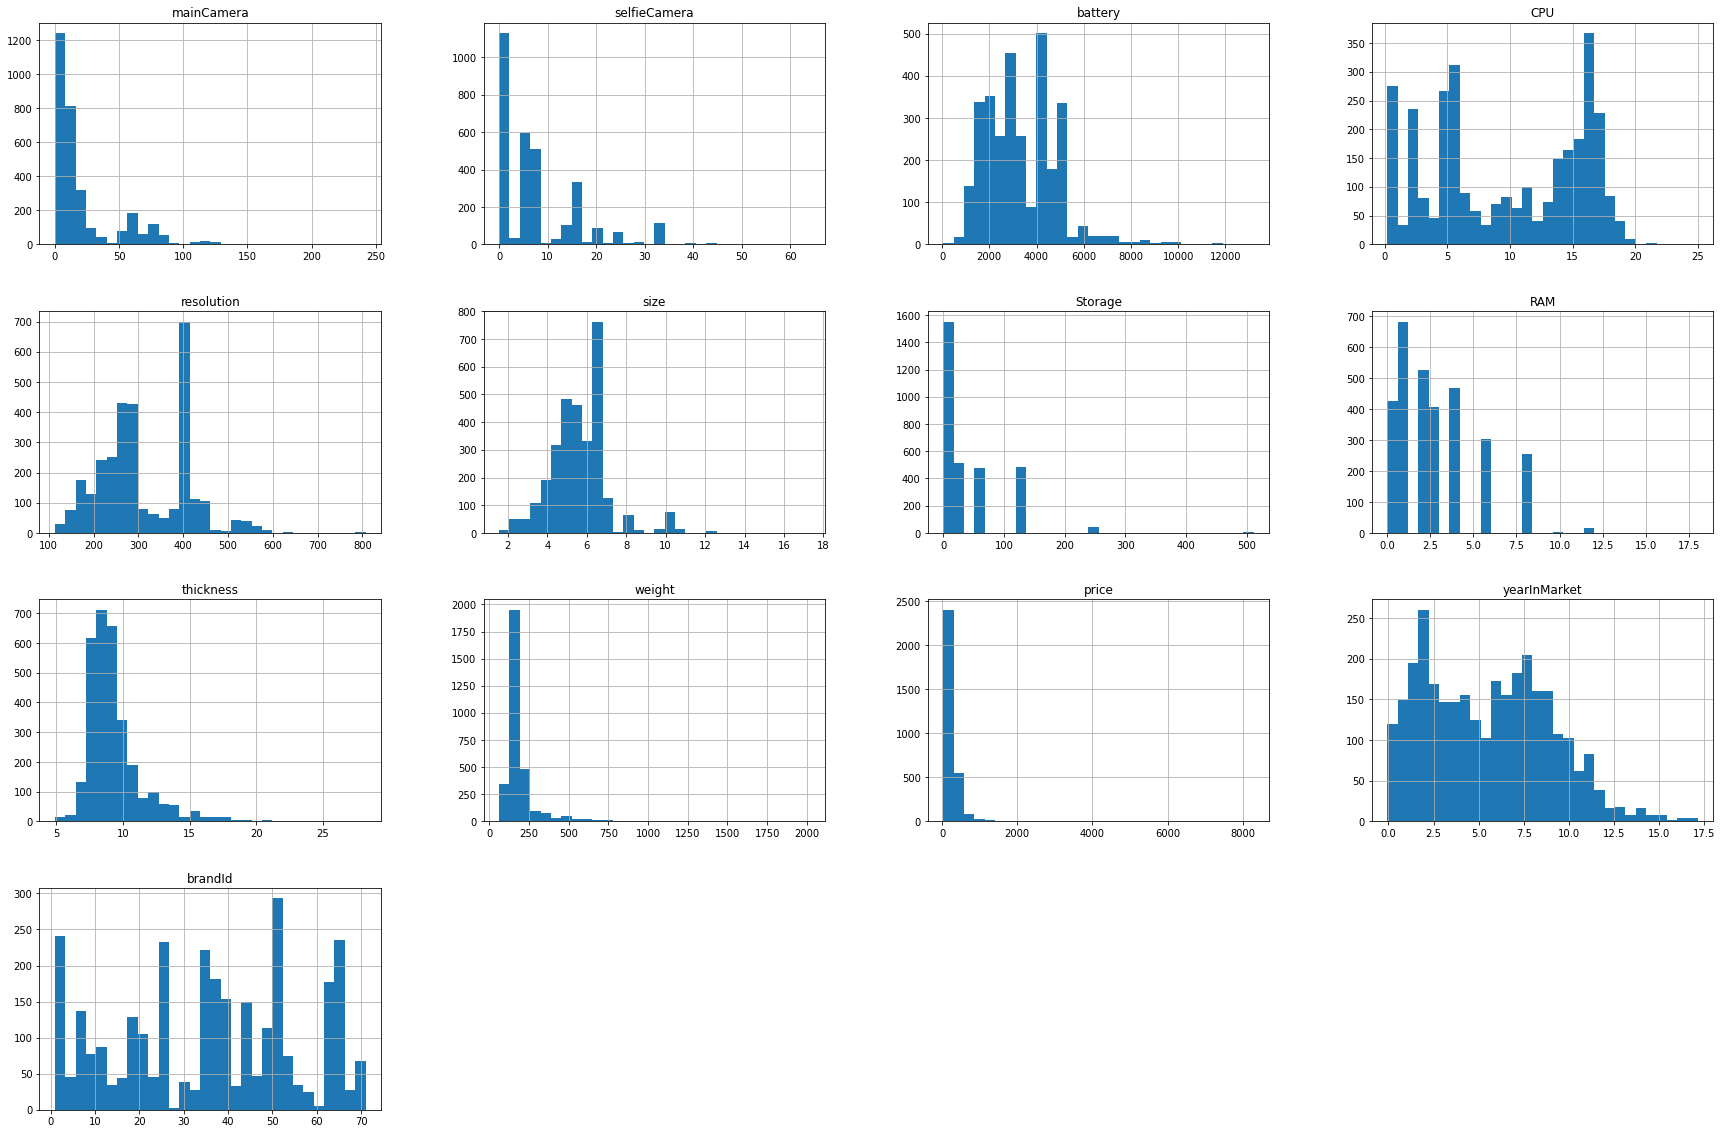

In [ ]:
fig = plt.figure(figsize = (30,20))
ax = fig.gca()
dfX.hist(ax = ax, bins=30)

Filter tablets by size

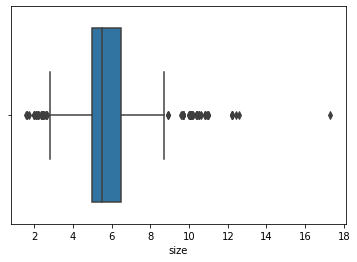

In [ ]:
sns.boxplot(data=dfPhone,x=dfPhone['size'])

127


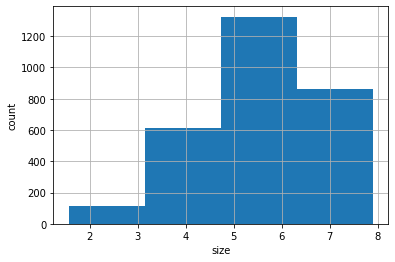

In [ ]:
print(dfPhone[dfPhone['size']>8]['size'].count())
dfPhone = dfPhone[dfPhone['size']<8]
dfX = dfPhone.drop(["name"], axis=1)
plt.xlabel("size")
plt.ylabel("count")
dfX["size"].hist(bins=4)

Filter phone by price

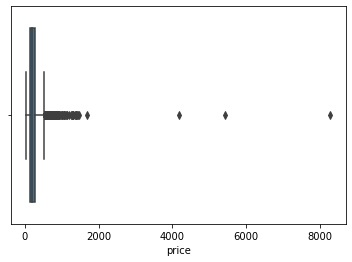

In [ ]:
sns.boxplot(data=dfPhone,x=dfPhone['price'])

7


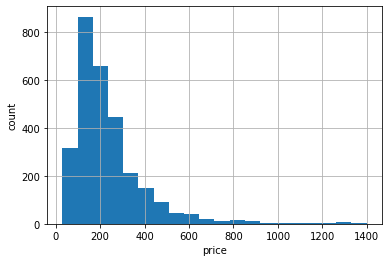

In [ ]:
print(dfPhone[dfPhone['price']>1400]['price'].count())
dfPhone = dfPhone[dfPhone['price']<1400]
dfX = dfPhone.drop(["name"], axis=1)
plt.xlabel("price")
plt.ylabel("count")
dfX["price"].hist(bins=20)

Filter phone by year

57


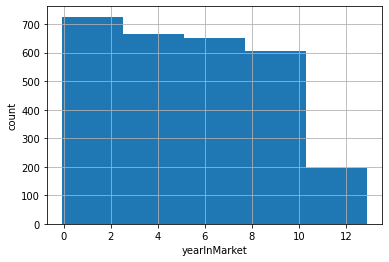

In [ ]:
#check
print(dfPhone[dfPhone['yearInMarket']>13]['yearInMarket'].count())
dfPhone = dfPhone[dfPhone['yearInMarket']<13]
dfX = dfPhone.drop(["name"], axis=1)
plt.xlabel("yearInMarket")
plt.ylabel("count")
dfX["yearInMarket"].hist(bins=5)

Correlation between variables visualized

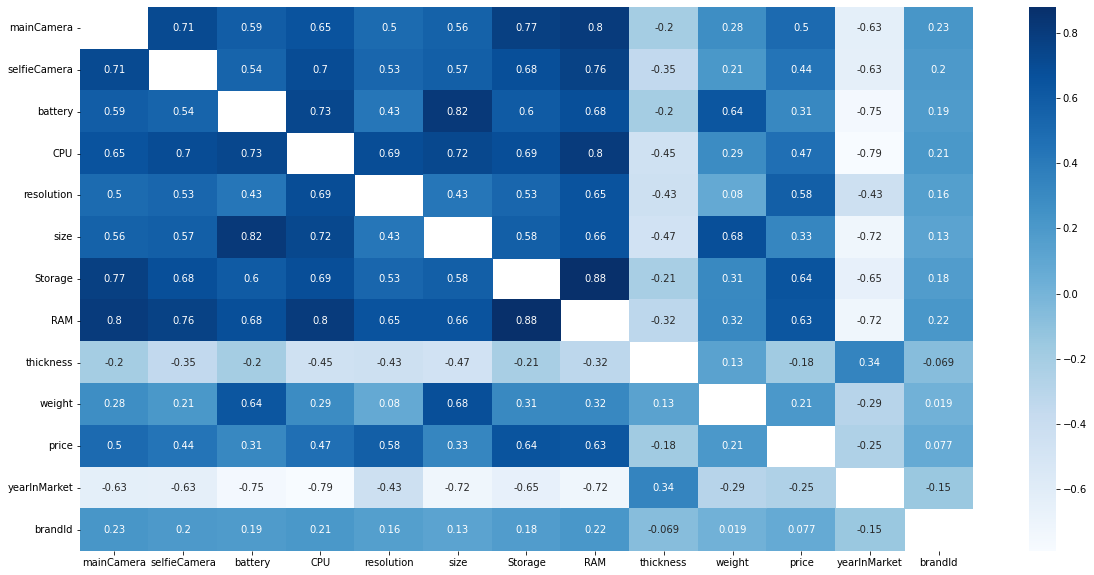

In [ ]:
corr = dfX.corr()
np.fill_diagonal(corr.values, 0)
corr.replace(0, np.nan, inplace=True)

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='Blues')

Display highest correlations between all of our variables

In [ ]:
corr.abs()['price'].sort_values(ascending=False)

Storage         0.644522
RAM             0.633682
resolution      0.577341
mainCamera      0.504348
CPU             0.468439
selfieCamera    0.439760
size            0.326662
battery         0.312294
yearInMarket    0.252160
weight          0.206749
thickness       0.183256
brandId         0.076530
price                NaN
Name: price, dtype: float64

Display top 3 highest correlated features on 3D axis 

In [ ]:
fig = px.scatter_3d(dfX.head(1000), x='RAM', y='Storage', z='resolution', color='price')
fig.show()

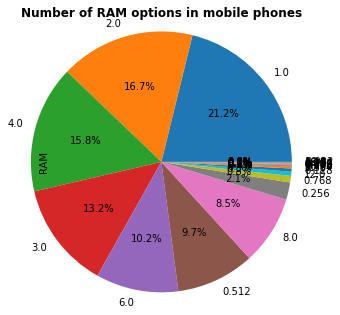

In [ ]:
n_cores = dfX['RAM'].value_counts()
plt.title('Number of RAM options in mobile phones\n\n', weight='bold')
n_cores.plot.pie(autopct="%.1f%%", radius=1.5)
plt.show()

**PCA**

In [ ]:
y = dfX["price"].to_numpy()
X = dfX.drop(["price"], axis=1).to_numpy()
print(type(X),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
# Standartization
X = StandardScaler().fit_transform(X)
# PCA 
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.55697896, 0.12026627, 0.0861824 ])

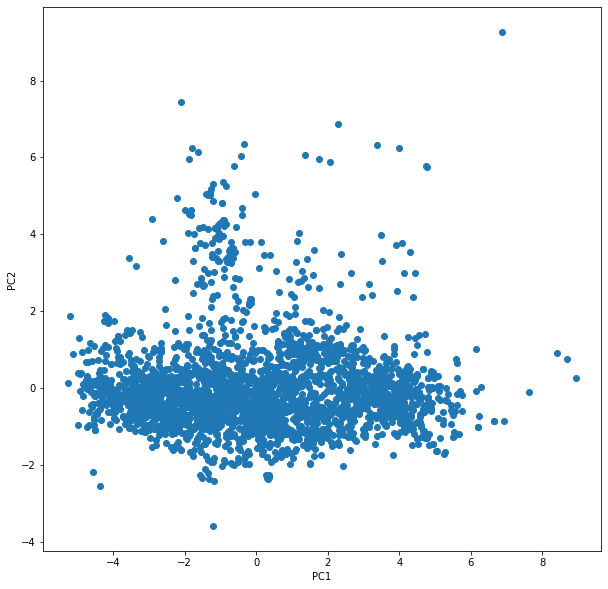

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.scatter(principalComponents[:,0], principalComponents[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.draw()

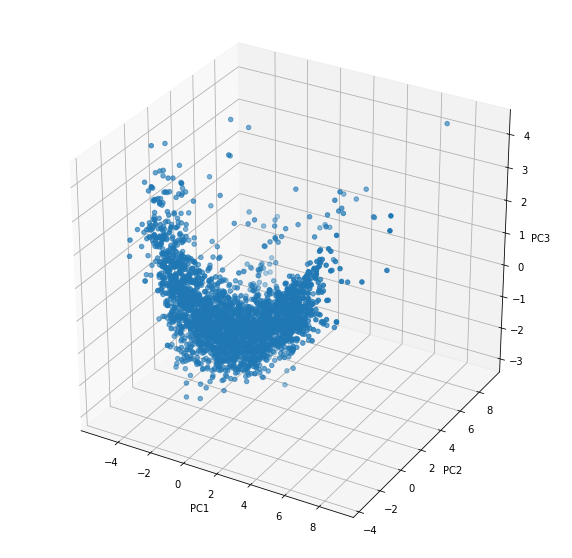

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
plt.xlabel("PC1")
plt.ylabel("PC2")
ax.set_zlabel("PC3")
ax.scatter(principalComponents[:,0], principalComponents[:,1], principalComponents[:,2])

# Machine Learning



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 , shuffle=True, random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(2276, 12) (569, 12)
(2276,) (569,)


In [ ]:
model = LinearRegression().fit(X_train, y_train)

In [ ]:
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

In [ ]:
# The mean squared error
print("TRAIN:")
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_train_predict))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.5f" % r2_score(y_train, y_train_predict))

TRAIN:
Mean squared error: 11848.28
Coefficient of determination: 0.59326


In [ ]:
# The mean squared error
print("TEST:")
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_predict))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.5f" % r2_score(y_test, y_test_predict))

TEST:
Mean squared error: 11861.27
Coefficient of determination: 0.56401


In [ ]:
#transforming target variable through quantile transformer using boosting algorithm as Gradient Boosting
model_trans = TransformedTargetRegressor(regressor=GradientBoostingRegressor(), transformer=QuantileTransformer(output_distribution='normal'))
model_trans.fit(X_train, y_train)
y_test_predict = model_trans.predict(X_test)
y_train_predict = model_trans.predict(X_train)

In [ ]:
# The mean squared error
print("TRAIN:")
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_train_predict))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.5f" % r2_score(y_train, y_train_predict))

TRAIN:
Mean squared error: 5481.61
Coefficient of determination: 0.81182


In [ ]:
# The mean squared error
print("TEST:")
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_predict))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.5f" % r2_score(y_test, y_test_predict))

TEST:
Mean squared error: 8962.22
Coefficient of determination: 0.67057
